# Capstone - Stage 2

* Grouping of Toronto Nieghborhoods based on the type of venues located in them.


## Task 1: Web Scraping for List of Communities in Toronto
## Import the necessary Libraries


In [1]:
import pandas as pd

## Loading Data from HTML
Pandas function read_HTML is used to load the table from a HTML page whose URL is provided to the function.

In [5]:
URL = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

df = pd.read_html(URL)

## Retaining only those neighborhoods where borough is asssigned

* We first copy the first table that was read by the pandas function into a new dataframe.
* Then we copy only those records where the borough column is not 'Not assigned' to a new dataframe.

* This new data frame will be our clean one for further processing.

In [6]:
odf = df[0]
df = odf[odf.Borough != 'Not assigned']
df

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [ ]:
df[df.Neighborhood == 'Not Assigned']

,Postal Code,Borough,Neighborhood


## Data is already in the suggested format.
* As can be seen from the output in the above two cells, the data is already processed as per the instructions given for the assignment.

* The following cell shows how the said task could have been done had it been needed
* Here, for illustration, 'postal code' and 'Neighborhood' variables are combined with commas based on variable 'Borough'

In [7]:
df.groupby('Borough').aggregate({'Postal Code':', '.join,'Neighborhood':', '.join})

,Postal Code,Neighborhood
Borough,,
Central Toronto,"M4N, M5N, M4P, M5P, M4R, M5R, M4S, M4T, M4V","Lawrence Park, Roselawn, Davisville North, For..."
Downtown Toronto,"M5A, M7A, M5B, M5C, M5E, M5G, M6G, M5H, M5J, M...","Regent Park, Harbourfront, Queen's Park, Ontar..."
East Toronto,"M4E, M4K, M4L, M4M, M7Y","The Beaches, The Danforth West, Riverdale, Ind..."
East York,"M4B, M4C, M4G, M4H, M4J","Parkview Hill, Woodbine Gardens, Woodbine Heig..."
Etobicoke,"M9A, M9B, M9C, M9P, M9R, M8V, M9V, M8W, M9W, M...","Islington Avenue, Humber Valley Village, West ..."
Mississauga,M7R,Canada Post Gateway Processing Centre
North York,"M3A, M4A, M6A, M3B, M6B, M3C, M2H, M3H, M2J, M...","Parkwoods, Victoria Village, Lawrence Manor, L..."
Scarborough,"M1B, M1C, M1E, M1G, M1H, M1J, M1K, M1L, M1M, M...","Malvern, Rouge, Rouge Hill, Port Union, Highla..."
West Toronto,"M6H, M6J, M6K, M6P, M6R, M6S","Dufferin, Dovercourt Village, Little Portugal,..."


In [ ]:
df.shape

(103, 3)

## Task 2: Adding the Latitude Longitude Information
* As was hinted in the instructions, the geocoder API was not reliable enough to get the latitude and longitude information.
* The following two cells show the attempt made at loading the required library and looping thourgh the rows of the data frame to put together lists of latitude and longitude of each postal code in the data frame.
* However, the API call was taking too much time and this approach  is abandoned.
* Thus the provided file was loaded and used instead.

In [8]:
!pip install geocoder
import geocoder

     |████████████████████████████████| 102kB 2.3MB/s 


In [9]:
for index, row in df.iterrows():
  ll = None
  la =[]
  lo =[]
  i=0
  while(ll is None):
    print('Attempt ',i)
    g = geocoder.google('{}, Toronto, Ontario'.format(row['Postal Code']))
    ll = g.latlng
    i+=1
  la.append(ll[0])
  lo.append(ll[1])

Attempt  0
Attempt  1
Attempt  2
Attempt  3
Attempt  4
Attempt  5
Attempt  6
Attempt  7
Attempt  8
Attempt  9
Attempt  10
Attempt  11
Attempt  12
Attempt  13
Attempt  14
Attempt  15
Attempt  16
Attempt  17
Attempt  18
Attempt  19
Attempt  20
Attempt  21
Attempt  22
Attempt  23
Attempt  24
Attempt  25
Attempt  26
Attempt  27
Attempt  28
Attempt  29
Attempt  30
Attempt  31
Attempt  32
Attempt  33
Attempt  34
Attempt  35
Attempt  36
Attempt  37
Attempt  38
Attempt  39
Attempt  40
Attempt  41
Attempt  42
Attempt  43
Attempt  44
Attempt  45
Attempt  46
Attempt  47
Attempt  48
Attempt  49
Attempt  50
Attempt  51
Attempt  52
Attempt  53
Attempt  54
Attempt  55
Attempt  56
Attempt  57
Attempt  58
Attempt  59
Attempt  60
Attempt  61
Attempt  62
Attempt  63
Attempt  64
Attempt  65
Attempt  66
Attempt  67
Attempt  68
Attempt  69
Attempt  70
Attempt  71
Attempt  72
Attempt  73
Attempt  74
Attempt  75
Attempt  76
Attempt  77
Attempt  78
Attempt  79
Attempt  80
Attempt  81
Attempt  82
Attempt  83
At

KeyboardInterrupt: ignored

In [28]:
latlng = pd.read_csv('/content/Geospatial_Coordinates.csv')
latlng.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


## Joining the postal code and location names with the corresponding latitude and longitude data.
* Pandas merge function is used to join the community names in dataframe 'df' with the latitude longitude data in 'latlng' data frame based on the 'Postal Code' column which is common in the two tables.

In [40]:
fdf = pd.merge(df,latlng, on='Postal Code')
fdf

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


## Task 3: Clustering of Communities

* In order to reduce the computational complexity, the analysis is limited to only the neighborhoods in boroughs whose names contain 'Toronto'
* A new data frame is created with only those boroughs which have 'Toronto' in their name.


In [56]:
Boro = fdf[fdf['Borough'].str.contains('Toronto')].reset_index(drop=True)
Boro

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


## Creating a new data frame with one row for each neighborhood
* The data frame now contains one row per each borough which is a collection of one or more neighborhoods.
* Since we are looking to cluster the neighborhoods rather than the borough, we first seperate out the individual neighborhoods in each borough and a new dataframe is created with one row for each neighborhood.
* Simultaneously, the latitude and longitude information for each neighborhood is retrieved from the geocoder API and is added to the corresponding record.
* There are a total of 71 neighborhoods in Toronto. 

In [105]:
Toronto_data = pd.DataFrame(columns=['Borough', 'Neighborhood', 'Latitude', 'Longitude'])

for ind, boro in Boro.iterrows():
    borough =  boro['Borough'] 

    
    for neigh in boro['Neighborhood'].split(','):

        address = '{}, Toronto, Ontario'.format(neigh)

        location = geolocator.geocode(address)
        try:
           latitude = location.latitude
           longitude = location.longitude
           Toronto_data = Toronto_data.append({'Borough': borough,
                                          'Neighborhood': neigh,
                                          'Latitude': latitude,
                                          'Longitude': longitude}, ignore_index=True)
        except:
           continue

Toronto_data

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,Regent Park,43.660706,-79.360457
1,Downtown Toronto,Harbourfront,43.640080,-79.380150
2,Downtown Toronto,Queen's Park,43.659659,-79.390340
3,Downtown Toronto,Garden District,43.656500,-79.377114
4,Downtown Toronto,Ryerson,43.658469,-79.378993
5,Downtown Toronto,St. James Town,43.669403,-79.372704
6,East Toronto,The Beaches,43.671024,-79.296712
7,Downtown Toronto,Berczy Park,43.647984,-79.375396
8,Downtown Toronto,Christie,43.664111,-79.418405
9,Downtown Toronto,Richmond,43.812589,-79.263370


## Additional Libraries
* Import the required additional libraries for clustering and plotting.

In [30]:

import numpy as np # library to handle data in a vectorized manner

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Plotting of Neighborhoods on Map
* A map is generated for the Toronto area and the locations of neighborhoods are marked on the map along with the labels.

In [31]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Ontario are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Ontario are 43.6534817, -79.3839347.


In [106]:
Toronto_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Toronto_map)  

In [107]:
Toronto_map

MAP OF TORONTO AREA SHOWING THE LOCATIONS OF NEIGHBORHOODS
 
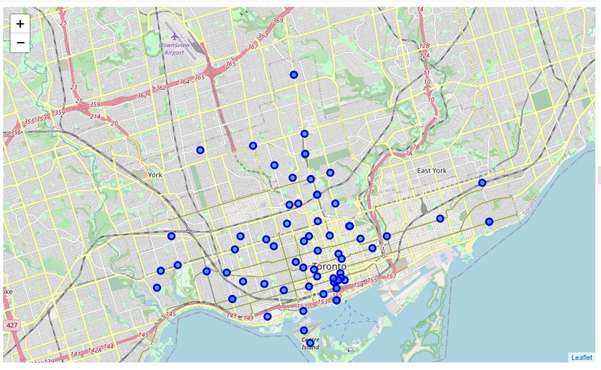

## Set the Credentials required for accessing data from Foursquares.

* Client ID and secret are set in this cell but they are now removed to protect privacy.

In [96]:
CLIENT_ID = '??????' # your Foursquare ID
CLIENT_SECRET = '*******' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 500
LIMIT=100

print('Four Square credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Four Square credentails:
CLIENT_ID: LGIKCWX0K4JEFA2X01F1Z0ELZUHNBF53CF3DFM1KOET2YIYN
CLIENT_SECRET:5SMLVSN3PYAKN250EUOYL2CUYOQ0211XNYG4MU3BFIZVACBN


## Retrieving information from Foursquare
* The function in the following cell is adapted from the ungraded assignment.
* The function is invoked to get venues in vicinity of each neighborhood.

In [110]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
Toronto_venues = getNearbyVenues(names=Toronto_data['Neighborhood'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude']
                                  )

## Summary of Venues data
* There are a total of 3592 Venues.
* Neighborhood wise counts of events are presented in the subsequent cell.
* There are a total of 302 unique categories of venues in Toronto.

In [149]:
print(Toronto_venues.shape)
Toronto_venues.head(15)

(3592, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Regent Park,43.660706,-79.360457,Regent Park Aquatic Centre,43.660600,-79.361392,Pool
1,Regent Park,43.660706,-79.360457,Sumach Espresso,43.658135,-79.359515,Coffee Shop
2,Regent Park,43.660706,-79.360457,Daniels Spectrum,43.660137,-79.361808,Performing Arts Venue
3,Regent Park,43.660706,-79.360457,Thai To Go,43.663418,-79.360710,Thai Restaurant
4,Regent Park,43.660706,-79.360457,Paintbox Bistro,43.660050,-79.362855,Restaurant
5,Regent Park,43.660706,-79.360457,Qi sushi,43.662552,-79.364258,Sushi Restaurant
6,Regent Park,43.660706,-79.360457,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
7,Regent Park,43.660706,-79.360457,Sukhothai,43.658444,-79.365681,Thai Restaurant
8,Regent Park,43.660706,-79.360457,Toronto Humane Society,43.657698,-79.356583,Animal Shelter
9,Regent Park,43.660706,-79.360457,I Love Churros,43.658364,-79.365583,Food Truck


In [114]:
Toronto_venues[['Neighborhood','Venue']].groupby('Neighborhood').count()

,Venue
Neighborhood,
Adelaide,100
Bathurst Quay,25
Cabbagetown,49
Chinatown,64
Deer Park,57
Design Exchange,100
Dovercourt Village,9
Exhibition Place,41
Forest Hill Road Park,7


In [115]:
print('There are',len(Toronto_venues['Venue Category'].unique()), 'unique types of venues in Toronto Neighborhoods')

There are 302 unique types of venues in Toronto Neighborhoods


## Data Preparation and Exploratory Data Analysis for Clustering
* A dummy variable is created for the categorical variable 'Venue Category' and it is concatenated with the 'Neighborhood' variable in the venues data frame.
* When creating dummy variables for the 'Venue Category' it was observed that there is category called 'Neighborhood' and to avoid a duplicate column name, the original 'Neighborhood' is renamed a 'Hood'.
* The new data frame called 'Toront_OH' has 303 columns (one for Neighborhood named 'Hood' and other 302 for each unique category) and 3592 records (one for each venue).

In [128]:
Toronto_OH =  pd.concat([pd.DataFrame.from_dict({'Hood':Toronto_venues['Neighborhood']}),
                          pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")]
                        ,axis=1)

In [129]:
Toronto_OH.head()

,Hood,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Storage Facility,Street Art,Strip Club,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tailor Shop,Taiwane

In [130]:
print(Toronto_OH.shape)

(3592, 303)


## Frequency of each type of venue in Neighborhoods
* Group_by function is used to find the frequency of each type of venue in the Neighborhood.
* There are 71 records in the new data frame.

In [131]:
Toronto_grouped = Toronto_OH.groupby('Hood').mean().reset_index()
Toronto_grouped

,Hood,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Storage Facility,Street Art,Strip Club,Supermarket,Sushi Restaurant,Syrian Restaurant,Taco Place,Tailor Shop,Taiwane

## Top 5 types of Venues in each Neighborhood
* For each of the 71 venues the top 5 most common types of venues are printed by adopting the same procedure as was used in the ungraded assignment.

In [132]:
num_top_venues = 5

for hood in Toronto_grouped['Hood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Hood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Adelaide----
                 venue  freq
0          Coffee Shop  0.07
1                  Gym  0.05
2                 Café  0.05
3           Restaurant  0.05
4  American Restaurant  0.04


---- Bathurst Quay----
          venue  freq
0   Coffee Shop  0.16
1          Café  0.12
2          Park  0.08
3  Dance Studio  0.04
4        Tunnel  0.04


---- Cabbagetown----
                venue  freq
0                Café  0.08
1          Restaurant  0.06
2         Coffee Shop  0.06
3  Chinese Restaurant  0.04
4          Beer Store  0.04


---- Chinatown----
                           venue  freq
0                   Dessert Shop  0.06
1                           Café  0.06
2             Mexican Restaurant  0.05
3  Vegetarian / Vegan Restaurant  0.05
4                  Grocery Store  0.03


---- Deer Park----
                venue  freq
0         Coffee Shop  0.12
1  Italian Restaurant  0.07
2     Thai Restaurant  0.05
3       Grocery Store  0.05
4    Sushi Restaurant  0.05


---- Design Ex

## Table of 10 most common types of venues in Neighborhoods.
* The following cells are taken from the ungraded assignment to make a table contains the top 10 venue categories available close to the neighborhoods.

In [133]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [135]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Hood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Coffee Shop,Café,Gym,Restaurant,Gastropub,American Restaurant,Cosmetics Shop,Seafood Restaurant,Japanese Restaurant,Breakfast Spot
1,Bathurst Quay,Coffee Shop,Café,Park,Diner,Harbor / Marina,Caribbean Restaurant,Bank,Ramen Restaurant,Sculpture Garden,Japanese Restaurant
2,Cabbagetown,Café,Coffee Shop,Restaurant,Bakery,Pub,Indian Restaurant,Italian Restaurant,Diner,Chinese Restaurant,Japanese Restaurant
3,Chinatown,Café,Dessert Shop,Mexican Restaurant,Vegetarian / Vegan Restaurant,Clothing Store,Bar,Bakery,Pizza Place,Coffee Shop,Art Gallery
4,Deer Park,Coffee Shop,Italian Restaurant,Sushi Restaurant,Grocery Store,Thai Restaurant,Bagel Shop,Sandwich Place,Café,Restaurant,Pub


## Clustering
* Same procedure, as was applied in the ungraded assignment, is used to perform the clustering.
  * The number of clusters is also taken as 5.
  * The cluster labels were added back to the venues data frame as well as to the data frame which has the top 10 most common venue types for each neighborhood.

In [138]:
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Hood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:30] 

array([2, 2, 0, 0, 2, 2, 2, 0, 4, 3, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 3, 0,
       0, 2, 0, 0, 0, 1, 0, 0], dtype=int32)

In [139]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = Toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Toronto_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,Regent Park,43.660706,-79.360457,2,Coffee Shop,Thai Restaurant,Pool,Electronics Store,Beer Store,Food Truck,Sushi Restaurant,Restaurant,Auto Dealership,Pub
1,Downtown Toronto,Harbourfront,43.640080,-79.380150,2,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant,Pizza Place,Sandwich Place,Sports Bar,Bank,Sushi Restaurant
2,Downtown Toronto,Queen's Park,43.659659,-79.390340,2,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Japanese Restaurant,French Restaurant,Thai Restaurant,Bubble Tea Shop,Chinese Restaurant,Discount Store
3,Downtown Toronto,Garden District,43.656500,-79.377114,0,Clothing Store,Coffee Shop,Restaurant,Hotel,Sandwich Place,Bakery,Japanese Restaurant,Tea Room,Theater,Ramen Restaurant
4,Downtown Toronto,Ryerson,43.658469,-79.378993,2,Coffee Shop,Clothing Store,Burger Joint,Ramen Restaurant,Japanese Restaurant,Café,Diner,Middle Eastern Restaurant,Bakery,Tea Room


## Visualization of the Clusters on the Map
* The neighbors are once again plotted on the Map of Toronto area using the approach used in the ungraded assignment.
* This time, the marker color signifies the cluster membership and the label also containes the cluster label.

In [141]:
# create map
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

MAP OF TORONTO AREA SHOWING NEIGHBORHOODS LOCATIONS USING COLOR CODED MARKERS THAT SIGNIFY CLUSTER MEMBERSHIP

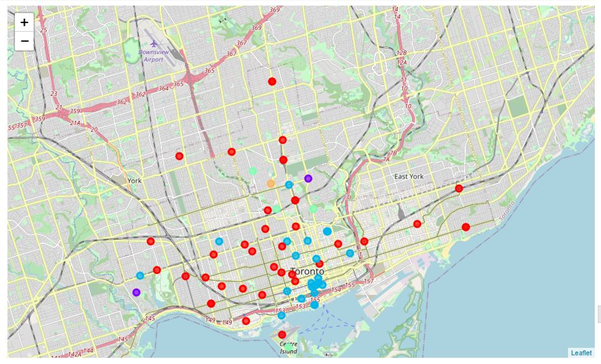

## List of Clusters
* The following cells print the members of each cluster.
* Cluster 1 has 39 Neighborhoods.
* Cluster 2 has 2 Neighborhoods.
* Cluster 3 has 25 Neighborhoods.
* Cluster 4 has 5 Neighborhoods.
* Cluster 5 has 1 Neighborhood.

In [151]:
Cluster1 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

print('Cluster 1 has the following', Cluster1.shape[0],'Neighborhoods')
Cluster1

Cluster 1 has the following 39 Neighborhoods


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Garden District,Clothing Store,Coffee Shop,Restaurant,Hotel,Sandwich Place,Bakery,Japanese Restaurant,Tea Room,Theater,Ramen Restaurant
6,The Beaches,Beach,Pizza Place,Tea Room,Thai Restaurant,Breakfast Spot,Bakery,Bar,Park,Japanese Restaurant,Pub
8,Christie,Korean Restaurant,Coffee Shop,Cocktail Bar,Grocery Store,Sandwich Place,Café,Karaoke Bar,Dessert Shop,Indian Restaurant,Ice Cream Shop
12,Dufferin,Bar,Bakery,Coffee Shop,Mexican Restaurant,Beer Store,Cocktail Bar,Café,Restaurant,Vietnamese Restaurant,Sandwich Place
17,Little Portugal,Bar,Café,Coffee Shop,Korean Restaurant,Cocktail Bar,Restaurant,Bakery,Thai Restaurant,Athletics & Sports,Jazz Club
19,The Danforth West,Coffee Shop,Grocery Store,Bus Line,Caribbean Restaurant,Sushi Restaurant,French Restaurant,Doctor's Office,Bank,Bakery,Skating Rink
20,Riverdale,Vietnamese Restaurant,Chinese Restaurant,Bakery,Fast Food Restaurant,Light Rail Station,Coffee Shop,Gym / Fitness Center,Bridal Shop,French Restaurant,Café
23,Brockton,Bar,Vietnamese Restaurant,Park,Pizza Place,Grocery Store,French Restaurant,Café,Gastropub,Dive Bar,Bakery
24,Parkdale Village,Tibetan Restaurant,Bakery,Indian Restaurant,Bar,Diner,Restaurant,Pharmacy,Bank,Beach Bar,Korean Restaurant
25,Exhibition Place,Theme Park,Soccer Stadium,Arts & Crafts Store,Athletics & Sports,Theme Park Ride / Attraction,Train Station,Poutine Place,Coffee Shop,Music Venue,Plaza


In [152]:
Cluster2 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

print('Cluster 2 has the following', Cluster2.shape[0],'Neighborhoods')
Cluster2

Cluster 2 has the following 2 Neighborhoods


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,Swansea,Park,Bus Line,Dance Studio,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant
50,Moore Park,Tennis Court,Gym,Park,Yoga Studio,Egyptian Restaurant,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant


In [153]:
Cluster3 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

print('Cluster 3 has the following', Cluster3.shape[0],'Neighborhoods')
Cluster3

Cluster 3 has the following 25 Neighborhoods


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Regent Park,Coffee Shop,Thai Restaurant,Pool,Electronics Store,Beer Store,Food Truck,Sushi Restaurant,Restaurant,Auto Dealership,Pub
1,Harbourfront,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant,Pizza Place,Sandwich Place,Sports Bar,Bank,Sushi Restaurant
2,Queen's Park,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Japanese Restaurant,French Restaurant,Thai Restaurant,Bubble Tea Shop,Chinese Restaurant,Discount Store
4,Ryerson,Coffee Shop,Clothing Store,Burger Joint,Ramen Restaurant,Japanese Restaurant,Café,Diner,Middle Eastern Restaurant,Bakery,Tea Room
5,St. James Town,Coffee Shop,Pizza Place,Café,Grocery Store,Playground,Bar,Beer Store,Bike Rental / Bike Share,Bistro,Breakfast Spot
7,Berczy Park,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Italian Restaurant,Seafood Restaurant,Bakery,Cocktail Bar,Gym
10,Adelaide,Coffee Shop,Café,Gym,Restaurant,Gastropub,American Restaurant,Cosmetics Shop,Seafood Restaurant,Japanese Restaurant,Breakfast Spot
11,King,Coffee Shop,Hotel,Restaurant,Café,Seafood Restaurant,Gastropub,American Restaurant,Japanese Restaurant,Italian Restaurant,Gym
13,Dovercourt Village,Café,Pizza Place,Bar,Bus Line,Restaurant,Park,Coffee Shop,Grocery Store,Donut Shop,Doctor's Office
14,Harbourfront East,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant,Pizza Place,Sandwich Place,Sports Bar,Bank,Sushi Restaurant


In [154]:
Cluster4 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

print('Cluster 4 has the following', Cluster4.shape[0],'Neighborhoods')
Cluster4

Cluster 4 has the following 5 Neighborhoods


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Richmond,Park,Ice Cream Shop,Beer Store,Event Space,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
16,Toronto Islands,Music Venue,Park,Harbor / Marina,Café,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Fast Food Restaurant
56,Rathnelly,Park,Mexican Restaurant,French Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Café,Liquor Store,Italian Restaurant,Pub,BBQ Joint
58,Forest Hill SE,Playground,Home Service,Bank,Arts & Crafts Store,Park,Yoga Studio,Egyptian Restaurant,Dog Run,Doner Restaurant,Donut Shop
66,Rosedale,Bike Trail,Playground,Park,Fish & Chips Shop,Egyptian Restaurant,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant


In [155]:
Cluster5 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

print('Cluster 5 has the following', Cluster5.shape[0],'Neighborhoods')
Cluster5

Cluster 5 has the following 1 Neighborhoods


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Forest Hill Road Park,Light Rail Station,Skating Rink,Supermarket,Liquor Store,Coffee Shop,Electronics Store,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
